# 離散一様分布

離散変数$X$が$1,2,..,K$を等確率でとる。すなわち、
$$
P(X=1) = P(X=2) = ... = P(X=K)
$$
であるとき、$X$の分布を**離散一様分布**とよぶ。  
期待値：$E[X] = \frac{K+1}{2}$  
分散：$V[X] = \frac{K^2-1}{12}$  
となる

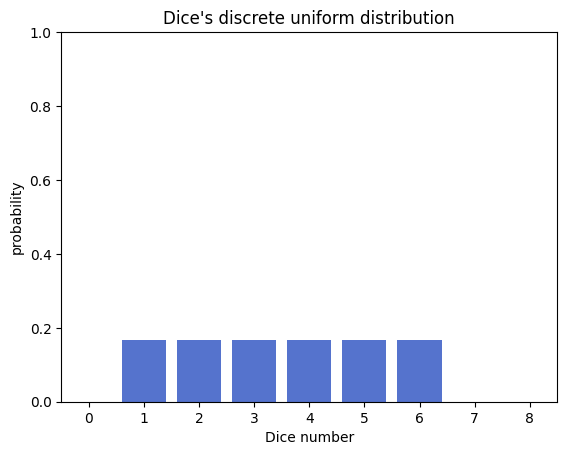

In [2]:
# 離散一様分布を描画
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

dice_df = pd.DataFrame(
    data={"probability":[0,1/6,1/6,1/6,1/6,1/6,1/6,0,0]}, 
    index=[0,1,2,3,4,5,6,7,8])
sns.barplot(data=dice_df, x=dice_df.index, y="probability", color='royalblue')
plt.title("Dice's discrete uniform distribution")
plt.xlabel("Dice number")
plt.ylim(0, 1)
plt.show()

# ベルヌーイ分布

成功確率$p$の**ベルヌーイ試行**に対し、確率変数$X$を成功時$1$、失敗時$0$とおく。  
$X$が従う分布を成功確率$p$の**ベルヌーイ分布**と呼び、$Bin(1,p)$と表す。  
期待値：$E[X] = p$  
分散：$V[X] = p(1-p)$  
となる

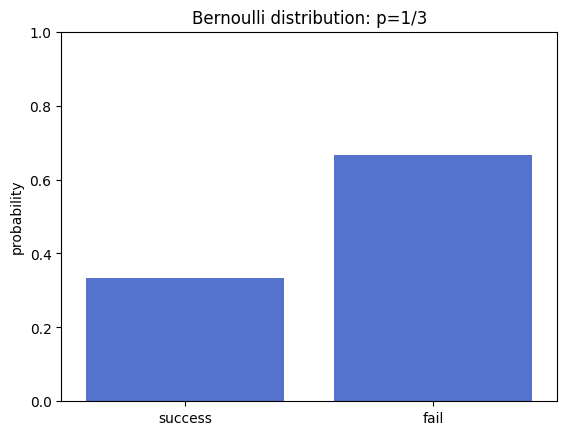

In [3]:
# ベルヌーイ分布を描画
bernoulli_df = pd.DataFrame(
    data={"probability":[1/3,2/3]}, 
    index=["success", "fail"])
sns.barplot(data=bernoulli_df, x=bernoulli_df.index, y="probability", color='royalblue')
plt.title("Bernoulli distribution: p=1/3")
plt.ylim(0, 1)
plt.show()

# 二項分布

成功確率$p$のベルヌーイ試行を$n$回行い$i(1 \leq i \leq n)$回目のベルヌーイ試行に対応する確率変数を$X_i$とする。  
$X_1,...,X_n$が独立なとき、$Y=X_1+...+X_n$が従う分布を成功確率の**二項分布**とよび、$Bin(1,p)$と表す。  
つまり、独立なベルヌーイ試行を$n$回行った時の成功回数の分布のことをいう。  
二項分布の確率関数は、
$$
P(Y=y) = {}_n C_y p^y (1-p)^{n-y}, \quad y=0,1,...,n
$$
となる。また、  
期待値：$E[Y] = np$  
分散：$V[Y] = np(1-p)$  
となる。  
さらに、二項分布には再生成と呼ばれる性質がある。  
$Y_1 \sim Bin(n_1,p)$, $Y_2 \sim Bin(n_2,p)$で$Y_1,Y_2$が独立ならば、$Y_1+Y_2 \sim Bin(n_1+n_2,p)$となる。

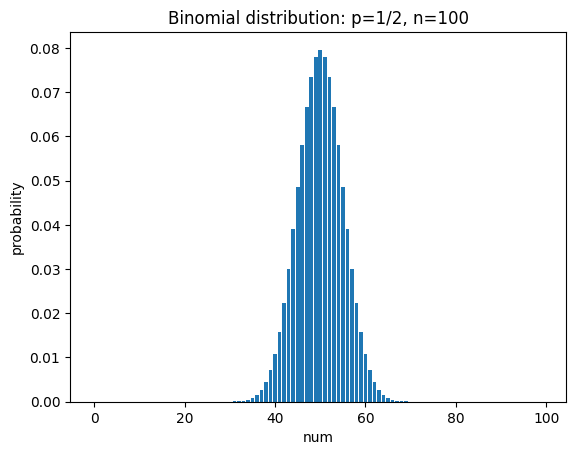

In [5]:
# 二項分布を描画
from scipy.stats import binom

n = 100
p = 1/2
x = range(n)
f = binom(n, p)
y = f.pmf(x)
plt.title("Binomial distribution: p=1/2, n=100")
plt.ylabel("probability")
plt.xlabel("num")
plt.bar(x, y)
plt.show()

# 超幾何分布

壺の中に$N$個の球が入っており、そのうち$M$個が赤玉で残りの$N-M$個が白玉である。  
ここから$n$個の球を取り出すとき、その中の赤玉の個数を$Y$とする。  
この$Y$について、非復元抽出の場合の分布を超幾何分布よとよび、$HG(N,M,n)$と表す。  
$Y \sim HG(N,M,n)$の確率関数は、
$$
P(Y=y) = \frac{{}_M C_y \times {}_{N-M} C_{n-y}}{{}_N C_n}
$$
である。また、  
期待値：$E[Y] = n \cdot \frac{M}{N}$  
分散：$V[Y] = n \cdot \frac{M}{N}(1 - \frac{M}{N}) \times \frac{M-n}{N-1}$  
となる

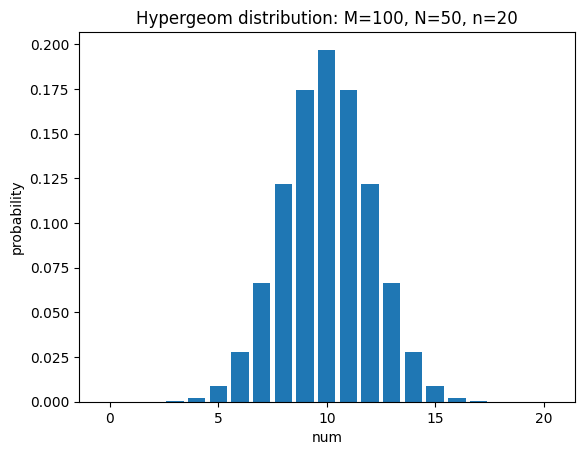

In [6]:
# 超幾何分布を描画
import numpy as np
from scipy.stats import hypergeom

[M, N, n] = [100, 50, 20]
rv = hypergeom(M, n, N)
x = np.arange(0, n+1)
y = rv.pmf(x)
plt.title("Hypergeom distribution: M=100, N=50, n=20")
plt.ylabel("probability")
plt.xlabel("num")
plt.bar(x, y)
plt.show()

# ポアソン分布

非負整数値をとる確率変数$Y$が、ある$\lambda > 0$に対して
$$
P(Y=y) = \frac{\lambda ^ y}{y!} e^{- \lambda}, \quad y=0,1,2,...
$$
を確率関数としてもつとする。このときの$Y$の分布を**ポアソン分布**といい、$Po(\lambda)$とあらわす。また、  
期待値：$E[Y] = \lambda$    
分散：$V[Y] = \lambda$   
となる。  
さらに、ポアソン分布に関しては、以下の再生成が成り立つ。  
$Y_1 \sim Po(\lambda_{1}), Y_2 \sim Po(\lambda_{2})$で、$Y_1, Y_2$が独立ならば、$Y_1+Y_2 \sim Po(\lambda_{1} + \lambda_{2})$となる。

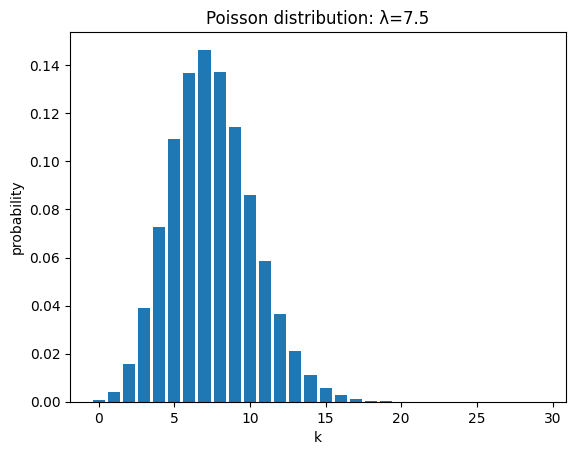

In [7]:
# ポアソン分布を描画 
from scipy.stats import poisson

lmd = 7.5 # 1か月あたりの平均交通故発生日数
n = 30 # 1か月
x = range(n)
y = poisson.pmf(x, lmd)
plt.title(f"Poisson distribution: λ={lmd}")
plt.ylabel("probability")
plt.xlabel("k")
plt.bar(x, y)
plt.show()

# 幾何分布

成功確率$p(0<p<1)$のベルヌーイ試行を繰り返したとき、はじめて成功するまでに発生する失敗回数を$X$とする。  
このときの$X$の分布を**幾何分布**とよび、$Geo(p)$とあらわす。また、  
期待値：$E[X] = \frac{1-p}{p}$  
分散：$V[X] = \frac{1-p}{p^2}$  
となる。さらに、  
幾何分布の**無記憶性**と呼ばれる性質として、$X \sim Geo(p)$のとき
$$
P(X \geq t_1+t_2 | X \geq t_1) = P(X \geq t_2), \quad t_1,t_2 = 0,1,2,...
$$
が成り立つ。

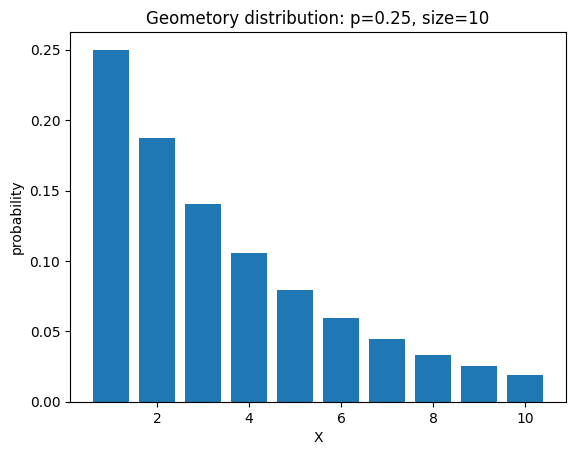

In [8]:
# 幾何分布を描画 
from scipy.stats import geom

p = 1/4
n = 10
x = range(1, n+1)
y = geom.pmf(k=x, p=p)
plt.title(f"Geometory distribution: p={p}, size={n}")
plt.ylabel("probability")
plt.xlabel("X")
plt.bar(x, y)
plt.show()

# 負の二項分布

成功確率$p$のベルヌーイ試行を繰り返したとき、$r$回目の成功が発生した時点でそれまでに発生した失敗回数を$Y$とする。  
このときの$Y$の分布を**負の二項分布**とよび、$NB(r, p)$とあらわす。  
なお、$NB(1, p)$は幾何分布である。また、  
期待値：$E[Y] = \frac{r(1-p)}{p}$  
分散：$V[Y] = \frac{r(1-p)}{p^2}$   
となる。さらに負の二項分布については以下の再生性が成り立つ。  
$Y_1 \sim NB(r_1,p), Y_2 \sim NB(r_2,p)$で、$Y_1, Y_2$が独立ならば、$Y_1+Y_2 \sim NB(r_1 + r_2,p)$となる

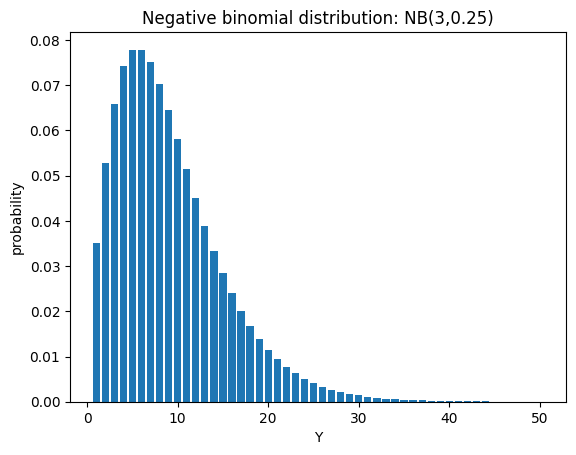

In [10]:
# 負の二項分布を描画
from scipy.stats import nbinom

p = 1/4
r = 3
n = 50
x = range(1, n+1)
y = nbinom.pmf(x, r, p)
plt.title(f"Negative binomial distribution: NB({r},{p})")
plt.ylabel("probability")
plt.xlabel("Y")
plt.bar(x, y)
plt.show()

# 多項分布

$K(\geq 2)$個の結果、$1,...,K$のいずれか一つが起こる試行を考える。  
結果$j(1 \leq j \leq k)$が起こる確率を$p_j(p_1 > 0, ..., p_k > 0, \quad p_1+...+p_k=1)$とする。  
この試行を独立に$n$回行うとき、結果$j$が起こる回数を$Y^{(j)}$とする。  
このとき、$Y := (Y^{(1)},...,Y^{(k)})$が従う分布を**多項分布**と呼ぶ。なお、  
期待値：$E[Y^{(j)}] = np_j, \quad j = 1,...K$  
分散：$V[Y^{(j)}] = np_j(1-p_j), \quad j = 1,...K$  
となる。さらに、多項分布においても二項分布と同様に再生成が成り立つ。

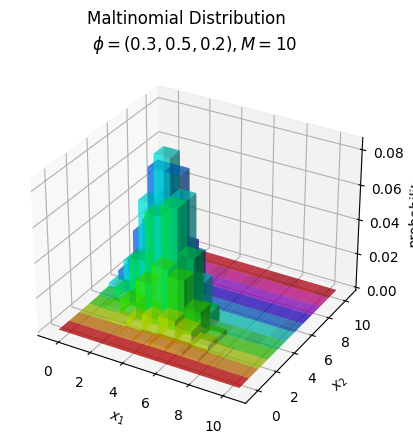

In [11]:
# 多項分布を描画
from scipy.stats import multinomial

M = 10
phi_v = np.array([0.3, 0.5, 0.2])

x_vals = np.arange(M + 1)
X1, X2 = np.meshgrid(x_vals, x_vals)

x1_vals = X1.flatten()
x2_vals = X2.flatten()
x3_vals = np.where(x1_vals+x2_vals <= M, M-(x1_vals+x2_vals), 0.0)

x_points = np.stack([x1_vals, x2_vals, x3_vals], axis=1)

probability = multinomial.pmf(x=x_points, n=M, p=phi_v)

cm = plt.get_cmap('hsv')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.bar3d(x=x1_vals-0.5, y=x2_vals-0.5, z=np.zeros_like(x1_vals), 
         dx=1.0, dy=1.0, dz=probability, 
         color=cm(x2_vals / M), alpha=0.5, shade=True)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('probability')
fig.suptitle('Maltinomial Distribution')
ax.set_title('$\phi=(' + ', '.join([str(phi) for phi in phi_v]) + '), M=' + str(M) + '$')
plt.show()